In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy

import env
import explore
import acquire
import prepare

plt.rcParams['figure.figsize'] = (4, 2)

Using iris data from our mySQL server and the methods used in the lesson above:

## 1. Acquire, prepare & split your data.

Acquire data using acquire.py

        Aquires iris data from SQL db and merges measurement and species tables

In [2]:
df = acquire.get_iris_data()
df

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...,...
145,3,146,6.7,3.0,5.2,2.3,virginica
146,3,147,6.3,2.5,5.0,1.9,virginica
147,3,148,6.5,3.0,5.2,2.0,virginica
148,3,149,6.2,3.4,5.4,2.3,virginica


Prep the data using prepare.prep_iris

    Takes in data from the iris db and turns it into a dataframe.
    Drops 'species_id' and 'measurement_id' columns.
    Renames the 'species_name' column to 'species'.
    Creates dummy variables of species name.

In [3]:
df = prepare.prep_iris(df)
df

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,0,1
146,6.3,2.5,5.0,1.9,virginica,0,0,1
147,6.5,3.0,5.2,2.0,virginica,0,0,1
148,6.2,3.4,5.4,2.3,virginica,0,0,1


Split the data

        take in a DataFrame and return train, validate, and test DataFrames; 
        test is 30% of original size
        stratify on species.
        returns train, validate, test DataFrames.

In [5]:
train_validate, test = train_test_split(df, 
                                        test_size=.2, 
                                        random_state=123, 
                                        stratify=df.species)

train, validate = train_test_split(train_validate, 
                                           test_size=.3, 
                                           random_state=123, 
                                           stratify=train_validate.species)
print(train.shape, validate.shape, test.shape)

(84, 8) (36, 8) (30, 8)


## 2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [6]:
# Create the variables that hold the categorical and quantitative measurements

cat_vars = ['setosa','versicolor','virginica']
quant_vars = ['sepal_length','sepal_width','petal_length','petal_width']

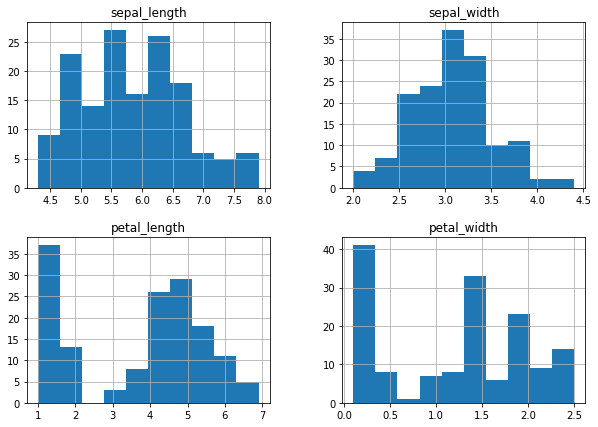

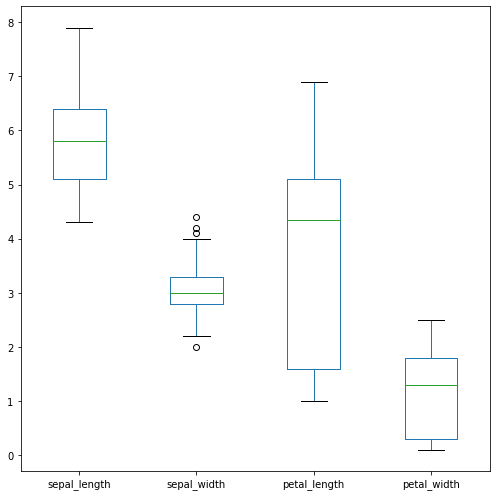

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df[quant_vars].hist(figsize=(10,7))
df[quant_vars].plot.box(figsize=(7,7))
plt.tight_layout()
plt.show()
df[quant_vars].describe()

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [8]:
species_piv = df.pivot_table(columns=df.species).head(4)
species_piv.T

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


(array([0, 1, 2, 3]),
 [Text(0, 0, 'petal_length'),
  Text(1, 0, 'petal_width'),
  Text(2, 0, 'sepal_length'),
  Text(3, 0, 'sepal_width')])

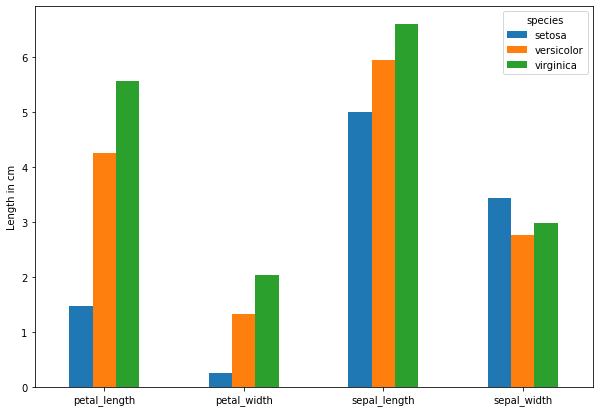

In [9]:
# plot a bar chart
species_piv.plot.bar(figsize=(10,7))
plt.ylabel('Length in cm')
plt.xticks(rotation=0)

- Document takeaways & any actions.

> On average, setosa  has the smallest measurements, followed by versicolor, then virginica (all measurements e except sepal width)

> Sepal width does not appear to be a good inidicator of iris species.

> Petal length appears to be the most reliable indicartor of species.


## 3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

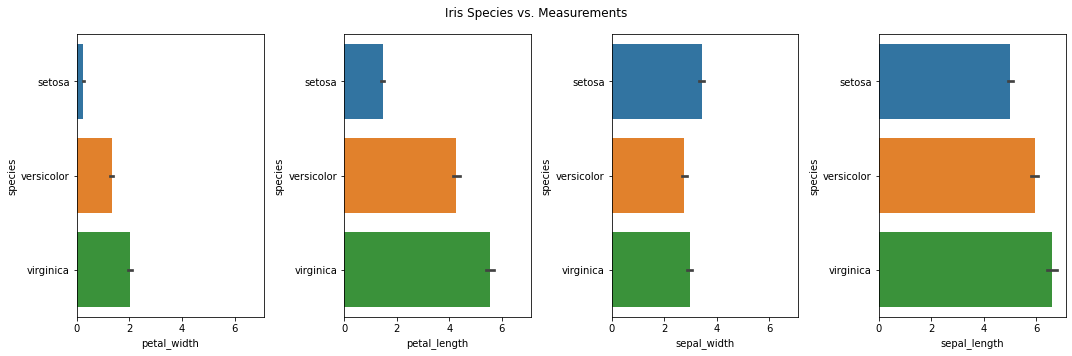

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=True)
sns.color_palette("tab10")
fig.suptitle('Iris Species vs. Measurements')

sns.barplot(ax=axes[0], x='petal_width', y='species', data=df)

sns.barplot(ax=axes[1], x='petal_length', y='species', data=df)

sns.barplot(ax=axes[2], x='sepal_width', y='species', data=df)

sns.barplot(ax=axes[3], x='sepal_length', y='species', data=df)

plt.tight_layout()

- For each measurement type, compute the descriptive statistics for each species.

In [11]:
for i in df[quant_vars]:
    for j in df[cat_vars]:
        print(j)
        print(df[i][df[j]==1].describe())
        print(f'\n')

setosa
count    50.00000
mean      5.00600
std       0.35249
min       4.30000
25%       4.80000
50%       5.00000
75%       5.20000
max       5.80000
Name: sepal_length, dtype: float64


versicolor
count    50.000000
mean      5.936000
std       0.516171
min       4.900000
25%       5.600000
50%       5.900000
75%       6.300000
max       7.000000
Name: sepal_length, dtype: float64


virginica
count    50.00000
mean      6.58800
std       0.63588
min       4.90000
25%       6.22500
50%       6.50000
75%       6.90000
max       7.90000
Name: sepal_length, dtype: float64


setosa
count    50.000000
mean      3.428000
std       0.379064
min       2.300000
25%       3.200000
50%       3.400000
75%       3.675000
max       4.400000
Name: sepal_width, dtype: float64


versicolor
count    50.000000
mean      2.770000
std       0.313798
min       2.000000
25%       2.525000
50%       2.800000
75%       3.000000
max       3.400000
Name: sepal_width, dtype: float64


virginica
count    50.00000

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.